In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sea
import matplotlib.pyplot as plt

In [2]:
warnings.filterwarnings('ignore',category=FutureWarning)
warnings.filterwarnings('ignore',category=UserWarning)

In [3]:
from sklearn.datasets import fetch_openml

In [4]:
mnist = fetch_openml('mnist_784',version=1)

In [5]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [6]:
X = mnist['data']
Y = mnist['target']
Y = Y.astype(int)

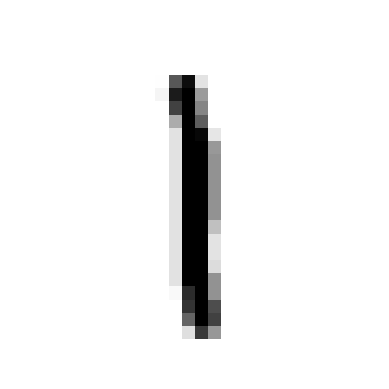

In [7]:
algarismo = X.iloc[17].values.reshape(28,28)
plt.imshow(algarismo,cmap='binary')
plt.axis('off')
plt.show()

In [8]:
Y.loc[Y==8].index[0]

17

In [9]:
Y.value_counts().sort_index()

class
0    6903
1    7877
2    6990
3    7141
4    6824
5    6313
6    6876
7    7293
8    6825
9    6958
Name: count, dtype: int64

&nbsp;

In [57]:
from sklearn.model_selection import train_test_split,cross_val_predict
from sklearn.linear_model    import SGDClassifier
from sklearn.metrics         import *
from sklearn.base            import BaseEstimator
from yellowbrick.classifier  import ROCAUC
from sklearn.ensemble        import RandomForestClassifier

In [11]:
xtrain , xtest , ytrain , ytest =  train_test_split(X,Y,random_state=0,train_size=60_000)

In [12]:
xtrain.shape,xtest.shape

((60000, 784), (10000, 784))

Classificar 8 classificação binária capaz de fazer distinçao de 2 classes 8 e não 8

In [13]:
index = ytest.loc[ytest == 8].index.tolist()

In [14]:
ytrain8 = (ytrain == 8)
ytest8  = (ytest  == 8)

In [15]:
gradEsto =  SGDClassifier(random_state=42)
gradEsto.fit(xtrain,ytrain8)

SGDClassifier(random_state=42)

In [16]:
gradEsto.predict([X.iloc[17]])

array([ True])

Tentar classificar 8 todos

In [17]:
gradEsto =  SGDClassifier(random_state=42)
gradEsto.fit(xtrain,ytrain8)

SGDClassifier(random_state=42)

In [18]:
predGrad = gradEsto.predict(xtest) 
predGrad

array([ True, False, False, ..., False, False, False])

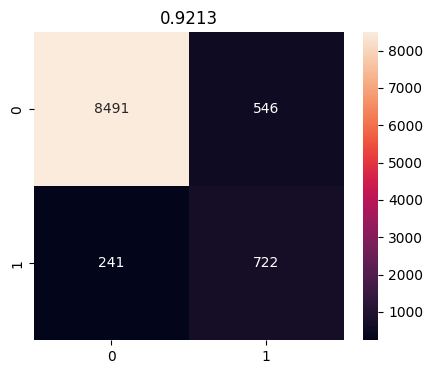

In [19]:
plt.figure(figsize=(5,4))
sea.heatmap( confusion_matrix(ytest8,predGrad),annot=True,fmt='' )
plt.title(accuracy_score(ytest8,predGrad))
plt.show()

In [20]:
print(classification_report(ytest8,predGrad,target_names=['Não é Oito','Oito']))

              precision    recall  f1-score   support

  Não é Oito       0.97      0.94      0.96      9037
        Oito       0.57      0.75      0.65       963

    accuracy                           0.92     10000
   macro avg       0.77      0.84      0.80     10000
weighted avg       0.93      0.92      0.93     10000



In [25]:
f1_score(ytest8,predGrad)

0.6472433886149709

In [52]:
ytest8.astype(int)

10840    0
56267    0
14849    0
62726    0
47180    0
        ..
63055    0
7991     0
39237    0
21866    0
38802    0
Name: class, Length: 10000, dtype: int64

In [58]:
random = RandomForestClassifier()

In [62]:
random.fit(xtrain,ytrain)
pred = random.predict(xtest)

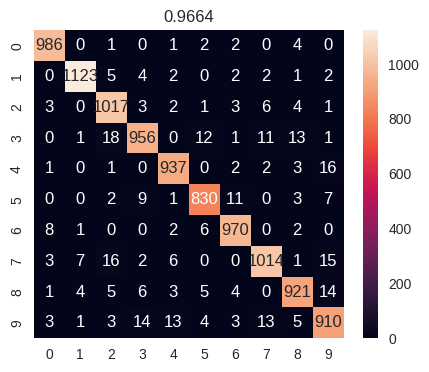

In [63]:
plt.figure(figsize=(5,4))
sea.heatmap( confusion_matrix(ytest,pred),annot=True,fmt='' )
plt.title(accuracy_score(ytest,pred))
plt.show()

In [64]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       996
           1       0.99      0.98      0.99      1141
           2       0.95      0.98      0.96      1040
           3       0.96      0.94      0.95      1013
           4       0.97      0.97      0.97       962
           5       0.97      0.96      0.96       863
           6       0.97      0.98      0.98       989
           7       0.97      0.95      0.96      1064
           8       0.96      0.96      0.96       963
           9       0.94      0.94      0.94       969

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



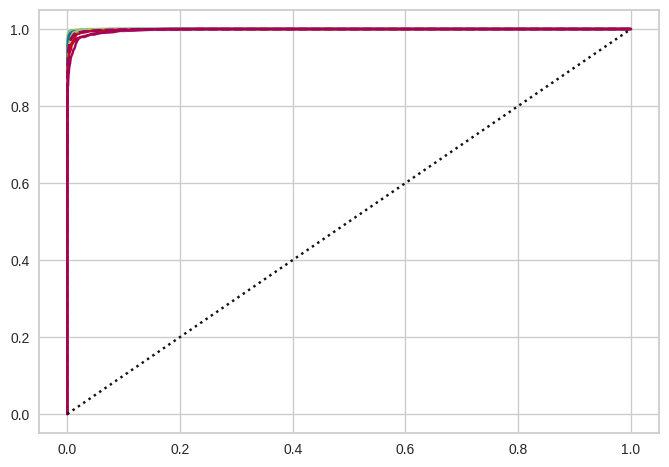

In [67]:
roc = ROCAUC(random)
roc.fit(xtrain,ytrain)
roc.score(xtest,ytest)
plt.show()